## LGMR reduced data
- first I used ncks -C -x -v lat,lon,months,nEns LGMR*.nc out.nc
    - I did this because xarray couldnt load the coordinates with same name as dims
- then I load data here and save down:
    - ensemble mean for all 'ages' aka keeping time dimensions (sea ice ONLY)
    - ensemble mean for LGM (19-23ka mean)
    - ensemble mean for LHolo (0-4ka mean)
    - TODO: full ensemble for LGM and LHolo
- next step is to infill so I can run GF and CAM

In [3]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import xarray as xr
import xesmf as xe
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copy
import pandas as pd
import cmocean as cmo
from cartopy.util import add_cyclic_point
import seaborn as sns

In [4]:
# tarea = xr.open_dataset('/home/disk/atmos/vcooper/work/ref/' + 'cicefsdww3i.cice.h1.0086.nc').tarea
landfrac = xr.open_dataset('/home/disk/atmos/vcooper/work/ref/' + 'domain.lnd.fv1.9x2.5_gx1v6.090206.nc')

In [5]:
## load LGMR Sea Ice
path = '/home/disk/atmos/vcooper/work/p2c2/lgm/LGMR/'
# fname = 'LGMR_SST_0-4ka_19-23ka.nc'
# fname = 'LGMR_SIC_0-4ka_19-23ka_xr.nc'
fname = 'ncks_SICv2.nc'
lgmr_lgm_sic = xr.open_dataset(path + fname)
lgmr_lgm_sic = lgmr_lgm_sic.rename_dims(lat='nlat').rename_dims(lon='nlon')

## fixing dimensions...
latnc = xr.open_dataset(path + 'lat_SIC.nc').rename_dims(lat='nlat').lat
lonnc = xr.open_dataset(path + 'lon_SIC.nc').rename_dims(lon='nlon').lon
lgmr_lgm_sic = lgmr_lgm_sic.assign_coords({'lat':latnc,
                                           'lon':lonnc})

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [6]:
## load LGMR SST
# fname = 'LGMR_SST_0-4ka_19-23ka.nc'
# fname = 'LGMR_SIC_0-4ka_19-23ka.nc'
fname = 'ncks_SSTv2.nc'
lgmr_lgm_sst = xr.open_dataset(path + fname)
lgmr_lgm_sst = lgmr_lgm_sst.rename_dims(lat='nlat').rename_dims(lon='nlon').set_coords(
    ['isLand_LGM','isLand_PI'])

## fixing dimensions...
latnc_sst = xr.open_dataset(path + 'nlat_SST.nc')#.rename_dims(lat='nlat').lat
# lonnc_sst = xr.open_dataset(path + 'lon_SST.nc').rename_dims(lon='nlon').lon ## ONLY need one
lgmr_lgm_sst = lgmr_lgm_sst.assign_coords({'lat':latnc_sst.lat,
                                           'lon':latnc_sst.lon})

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


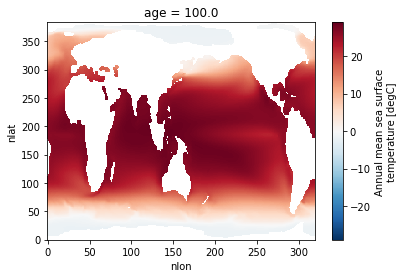

In [18]:
iens = 10
iage = 0
lgmr_lgm_sst.sst_ann[iens,iage].plot()

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perfo

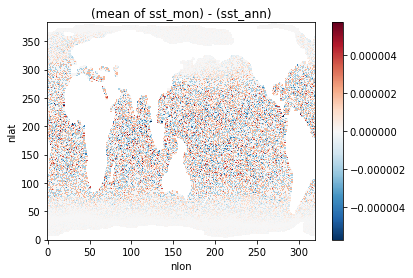

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


Text(0.5, 1.0, '(mean of sic_mon) - (sic_ann)')

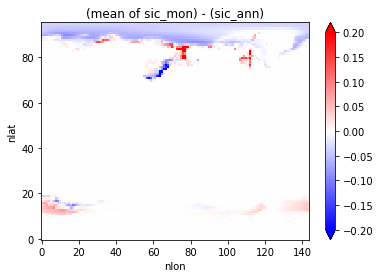

In [21]:
(lgmr_lgm_sst.sst_mon[iens,iage].mean(axis=0) - lgmr_lgm_sst.sst_ann[iens,iage]).plot()
plt.title('(mean of sst_mon) - (sst_ann)')
plt.show()

(lgmr_lgm_sic.sic_mon[iens,iage].mean(axis=0) - lgmr_lgm_sic.sic_ann[iens,iage]).plot(
    vmin=-0.2,vmax=0.2,cmap='bwr')
plt.title('(mean of sic_mon) - (sic_ann)')

## Saving sea ice files

In [34]:
%%time
## calculate ensemble mean across all time
lgmr_lgm_sic_ensmean = lgmr_lgm_sic.mean(dim='nEns')

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


CPU times: user 2.86 s, sys: 1.79 s, total: 4.66 s
Wall time: 35.2 s


In [36]:
%%time
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_lgm_sic_ensmean.to_netcdf(savepath + 'LGMR_SIC_0-4ka_19-23ka_ensmean.nc')
print('finished saving')

finished saving
CPU times: user 40.9 ms, sys: 59.1 ms, total: 100 ms
Wall time: 6.43 s


In [37]:
check_sic = xr.open_dataset(savepath + 'LGMR_SIC_0-4ka_19-23ka_ensmean.nc')

In [70]:
lgmr_lgm_sic_ensmean.age < 19000

<xarray.DataArray 'age' (age: 40)>
array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])
Coordinates:
  * age      (age) float32 100.0 300.0 500.0 ... 2.25e+04 2.27e+04 2.29e+04

In [46]:
lgmr_lgm_sic_ensmean19ka23ka = lgmr_lgm_sic_ensmean.where(lgmr_lgm_sic_ensmean.age > 19000).mean(dim='age')

In [48]:
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_lgm_sic_ensmean19ka23ka.to_netcdf(savepath + 'LGMR_SIC_lgm_19-23ka_ensmean.nc')
print('finished saving')

finished saving


In [71]:
lgmr_holo_sic_ensmean0ka4ka = lgmr_lgm_sic_ensmean.where(lgmr_lgm_sic_ensmean.age < 4000).mean(dim='age')

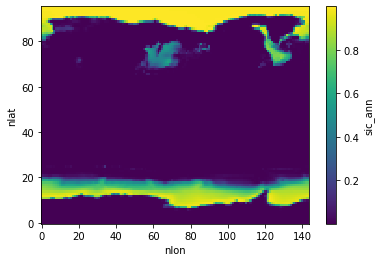

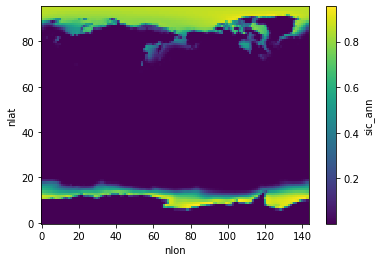

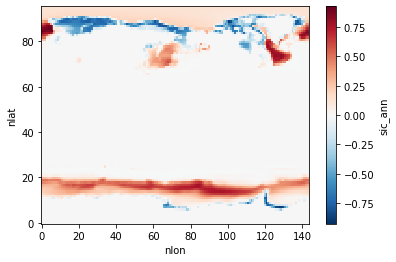

In [74]:
lgmr_lgm_sic_ensmean19ka23ka.sic_ann.plot()
plt.show()

lgmr_holo_sic_ensmean0ka4ka.sic_ann.plot()
plt.show()

(lgmr_lgm_sic_ensmean19ka23ka.sic_ann - lgmr_holo_sic_ensmean0ka4ka.sic_ann).plot()
plt.show()

In [75]:
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_holo_sic_ensmean0ka4ka.to_netcdf(savepath + 'LGMR_SIC_holo_0-4ka_ensmean.nc')
print('finished saving')

finished saving


## Saving SST files

In [4]:
lgmr_sst_19ka23ka = lgmr_lgm_sst.sel(age=slice(19000,23000))
lgmr_sst_0ka4ka = lgmr_lgm_sst.sel(age=slice(0,4000))

LGM first (19-23ka)

In [84]:
%%time
## calculate time mean for ensemble members
lgmr_sst_19ka23ka_tmean = lgmr_sst_19ka23ka.mean(dim='age')

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


CPU times: user 14.4 s, sys: 24.5 s, total: 39 s
Wall time: 1min 51s


In [107]:
%%time
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_sst_19ka23ka_tmean.to_netcdf(savepath + 'LGMR_SST_lgm_19-23ka_ens.nc')
print('finished saving')

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


finished saving
CPU times: user 44.2 ms, sys: 345 ms, total: 389 ms
Wall time: 4.55 s


In [108]:
%%time
## ensemble mean for LGM
lgmr_sst_19ka23ka_tmean_ensmean = lgmr_sst_19ka23ka_tmean.mean(dim='nEns')

CPU times: user 376 ms, sys: 94 ms, total: 470 ms
Wall time: 467 ms


In [111]:
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_sst_19ka23ka_tmean_ensmean.to_netcdf(savepath + 'LGMR_SST_lgm_19-23ka_ensmean.nc')
print('finished saving')

finished saving
CPU times: user 22.9 ms, sys: 11.2 ms, total: 34.1 ms
Wall time: 495 ms


Late Holocene now first (0-4ka)

In [112]:
%%time
## calculate time mean for ensemble members
lgmr_sst_0ka4ka_tmean = lgmr_sst_0ka4ka.mean(dim='age')

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


CPU times: user 14.7 s, sys: 23.8 s, total: 38.5 s
Wall time: 1min 13s


In [117]:
lgmr_sst_0ka4ka_tmean = lgmr_sst_0ka4ka_tmean.set_coords(['isLand_LGM','isLand_PI'])

In [118]:
lgmr_sst_0ka4ka_tmean = lgmr_sst_0ka4ka_tmean.assign_coords({'lat':latnc_sst.lat,
                                           'lon':latnc_sst.lon})
lgmr_sst_0ka4ka_tmean

<xarray.Dataset>
Dimensions:     (nlat: 384, nlon: 320, nEns: 50, months: 12)
Coordinates:
    isLand_LGM  (nlat, nlon) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    isLand_PI   (nlat, nlon) float32 1.0 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0 1.0
    lat         (nlat, nlon) float32 ...
    lon         (nlat, nlon) float32 ...
Dimensions without coordinates: nlat, nlon, nEns, months
Data variables:
    sst_ann     (nEns, nlat, nlon) float32 nan nan nan nan ... nan nan nan nan
    sst_mon     (nEns, months, nlat, nlon) float32 nan nan nan ... nan nan nan

In [119]:
%%time
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_sst_0ka4ka_tmean.to_netcdf(savepath + 'LGMR_SST_holo_0-4ka_ens.nc')
print('finished saving ens members')

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


finished saving ens members
CPU times: user 30.3 ms, sys: 357 ms, total: 388 ms
Wall time: 4.53 s


In [120]:
## ensemble mean for L Holo
lgmr_sst_0ka4ka_tmean_ensmean = lgmr_sst_0ka4ka_tmean.mean(dim='nEns')

In [125]:
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_sst_0ka4ka_tmean_ensmean.to_netcdf(savepath + 'LGMR_SST_holo_0-4ka_ensmean.nc')
print('finished saving')

finished saving


## check outputs

In [26]:
## holo
savepath = '/home/disk/sipn/vcooper/nobackup/lgm/LGMR/'
lgmr_sst_0ka4ka_tmean_ensmean = xr.open_dataset(savepath + 'LGMR_SST_holo_0-4ka_ensmean.nc')

lgmr_holo_sic_ensmean0ka4ka = xr.open_dataset(savepath + 'LGMR_SIC_holo_0-4ka_ensmean.nc')
lgmr_holo_sic_ensmean0ka4ka

<xarray.Dataset>
Dimensions:  (nlat: 96, nlon: 144, months: 12)
Coordinates:
    lat      (nlat) float32 ...
    lon      (nlon) float32 ...
Dimensions without coordinates: nlat, nlon, months
Data variables:
    sic_ann  (nlat, nlon) float32 ...
    sic_mon  (months, nlat, nlon) float32 ...

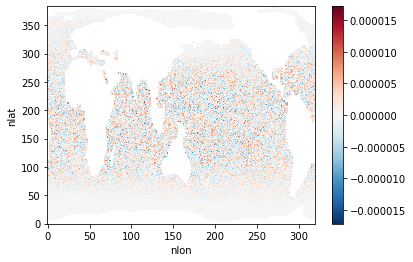

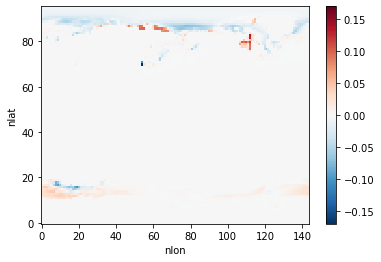

In [25]:
(lgmr_sst_0ka4ka_tmean_ensmean.sst_mon.mean(axis=0) - lgmr_sst_0ka4ka_tmean_ensmean.sst_ann).plot()
plt.show()

(lgmr_holo_sic_ensmean0ka4ka.sic_mon.mean(axis=0) - lgmr_holo_sic_ensmean0ka4ka.sic_ann).plot()
plt.show()

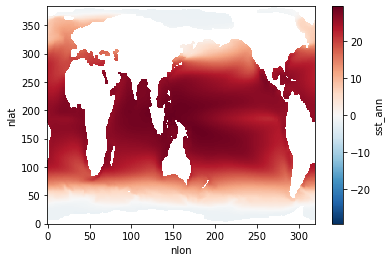

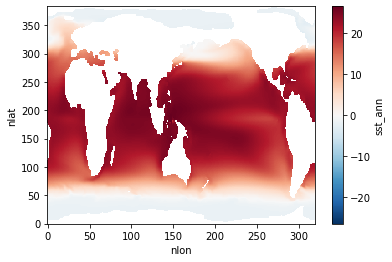

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


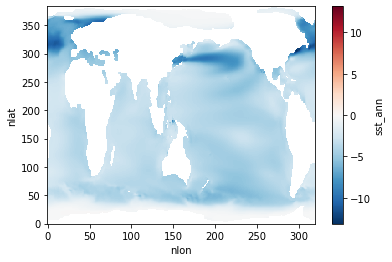

In [126]:
lgmr_sst_0ka4ka_tmean_ensmean.sst_ann.plot()
plt.show()

lgmr_sst_19ka23ka_tmean_ensmean.sst_ann.plot()
plt.show()

(lgmr_sst_19ka23ka_tmean_ensmean.sst_ann - lgmr_sst_0ka4ka_tmean_ensmean.sst_ann).plot()
plt.show()

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


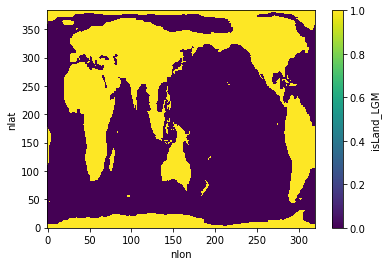

In [123]:
lgmr_sst_0ka4ka_tmean_ensmean.isLand_LGM.plot()

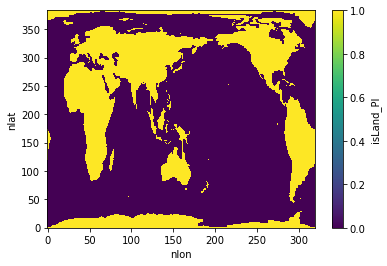

In [124]:
lgmr_sst_0ka4ka_tmean_ensmean.isLand_PI.plot()

# AFTER INFILLING
- used ncecat to concatenate months
- then used ncks -3 in.nc out.nc to convert to ncdf3, then ncrename -d record,month o.nc
- then ncks -4 o.nc o.nc
- Now time to regrid onto AMIP grid

In [ ]:
## TO DO

## Review talk: infilled version

In [24]:
path = '/home/disk/sipn/vcooper/nobackup/lgm/infilled/'
fname = 'LGMR_lgm_SST_monthly_climo_merged.nc'
lgmr_lgm_merged = xr.open_dataset(path + fname)
lgmr_lgm_merged_ann = lgmr_lgm_merged.mean(dim='month')

fname = 'LGMR_holo_SST_monthly_climo_merged.nc'
lgmr_holo_merged = xr.open_dataset(path + fname)
lgmr_holo_merged_ann = lgmr_holo_merged.mean(dim='month')

ds = lgmr_lgm_merged

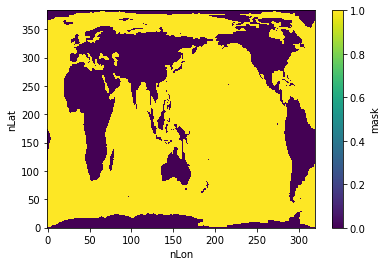

In [140]:
ds['mask'] = xr.where(np.isnan(ds.sst[0]),0,1)
ds.mask.plot()

In [32]:
## use existing bc as target grid

newgrid = xr.open_dataset('/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/holo_bc_final_prediddle_v2.nc').isel(time=0)
newgrid['mask'] = xr.where(~np.isnan(newgrid.SST_cpl),1,0)

data_for_regridding = lgmr_lgm_merged_ann
data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding.sst),1,0)

regridder = xe.Regridder(data_for_regridding, newgrid,
                         method='bilinear',
                         periodic=True,
                         extrap_method='inverse_dist',extrap_num_src_pnts=8,
                         # filename='bilinear_CMIPsst-to-1.9x2.5_per_extrapID8.nc',
                         reuse_weights=False)
regridder

lgm_infill_regrid = regridder(data_for_regridding)
holo_infill_regrid = regridder(lgmr_holo_merged_ann)

## sic
# data_for_regridding = a4x_sic
# data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding.sic[-1]),1,0)
# a4x_sic_regrid = regridder(data_for_regridding)

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/frontend.py:567: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


## Burls review talk plots

In [27]:
## original pattern and reworked version

In [7]:
%%time
lgm_patternmean = lgmr_sst_19ka23ka.sst_ann.mean(dim=('nEns','age'))
# lgmr_sst_0ka4ka

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


CPU times: user 1.01 s, sys: 685 ms, total: 1.69 s
Wall time: 6.55 s


In [8]:
holo_patternmean = lgmr_sst_0ka4ka.sst_ann.mean(dim=('nEns','age'))
# lgmr_sst_0ka4ka

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [18]:
newgrid = xr.open_dataset('/home/disk/sipn/vcooper/nobackup/lgm/cam_sst/holo_bc_final_prediddle_v2.nc').isel(time=0)
newgrid['mask'] = xr.where(~np.isnan(newgrid.SST_cpl),1,0)

data_for_regridding = lgm_patternmean
data_for_regridding['mask'] = xr.where(~np.isnan(data_for_regridding),1,0)

regridder = xe.Regridder(data_for_regridding, newgrid,
                         method='bilinear',
                         periodic=True,
                         extrap_method='inverse_dist',extrap_num_src_pnts=8,
                         # filename='bilinear_CMIPsst-to-1.9x2.5_per_extrapID8.nc',
                         reuse_weights=False)
regridder

lgm_patternmean_regrid = regridder(data_for_regridding)
holo_patternmean_regrid = regridder(holo_patternmean)

/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/core/dataarray.py:789: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return key in self.data
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xarray/coding/variables.py:140: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/backend.py:53: UserWarning: Latitude is outside of [-90, 90]
  warnings.warn('Latitude is outside of [-90, 90]')
/home/disk/atmos/vcooper/miniconda3/envs/beauchard/lib/python3.7/site-packages/xesmf/frontend.py:534: FutureWarning: ``output_sizes`` should be given in the ``dask_gufunc_kwargs`` parameter. It will be removed as direct parameter in a future version.
  keep_attrs=keep_attrs,


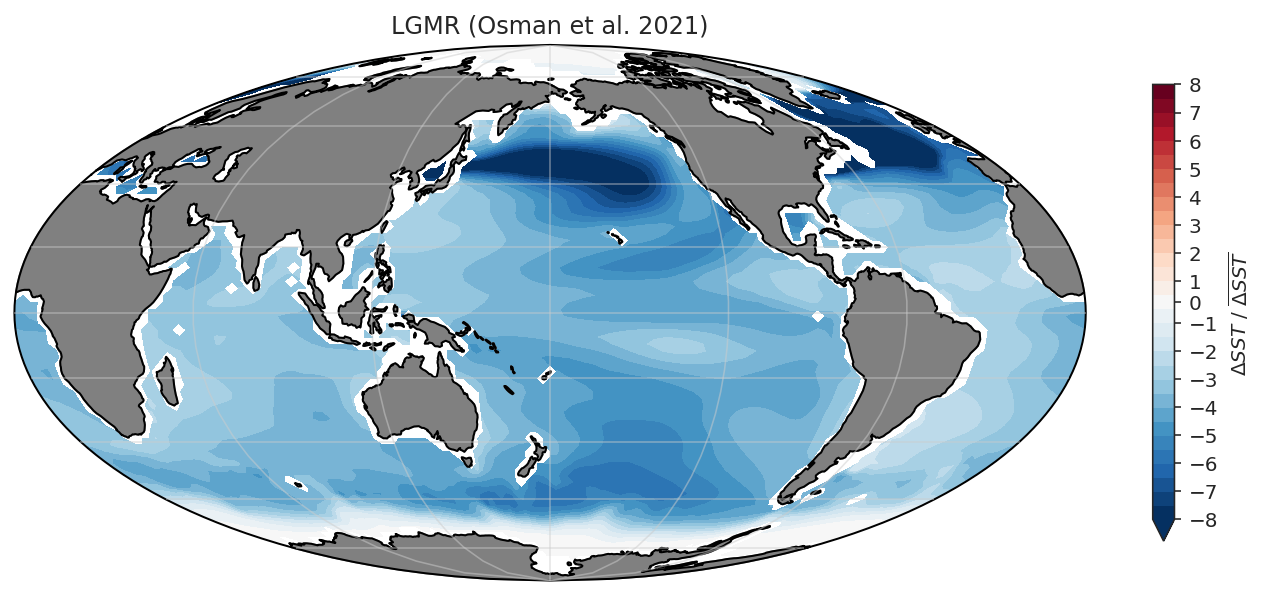

In [22]:

with sns.axes_style('ticks'):
    nlevs = 8*4 ## must be even
    vabs = 8
    levs = np.delete(np.linspace(-vabs,vabs,nlevs+1),nlevs//2)
    cmap=plt.cm.get_cmap('RdBu_r', nlevs-1)

    fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72*2, 
                          subplot_kw={'projection':ccrs.Mollweide(central_longitude=180)})
    axtemp = ax
    plt.sca(axtemp)

    ds = lgm_patternmean_regrid - holo_patternmean_regrid
#     gmean = (ds * landfrac.area.values).sum() / landfrac.area.values.sum()
#     ds = ds/gmean.values 
    ## add cyclic point
    lon_idx = ds.dims.index('lon')
    lon = ds.coords['lon']
    wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

#     plt.pcolormesh(ds.lon, ds.lat, ds,
#                 cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#                 transform=ccrs.PlateCarree())
    plt.contourf(wrap_lon, ds.lat, wrap_ds,
                cmap = cmap, vmin=-vabs,vmax=vabs,levels=levs, extend='min',
                transform=ccrs.PlateCarree())

    # plt.colorbar(shrink=0.6)
    plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,1), 
                 label='$\Delta SST$ / $\overline{\Delta SST}$')
    axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
    axtemp.coastlines(color='k',zorder=1)
    axtemp.gridlines(zorder=6,alpha=0.5)
    plt.title('LGMR (Osman et al. 2021)')
    plt.show()

In [47]:
ds = lgm_infill_regrid.sst - holo_infill_regrid.sst
(ds * landfrac.area.values).sum() / landfrac.area.values.sum()

<xarray.DataArray 'sst' ()>
array(-3.70377181)

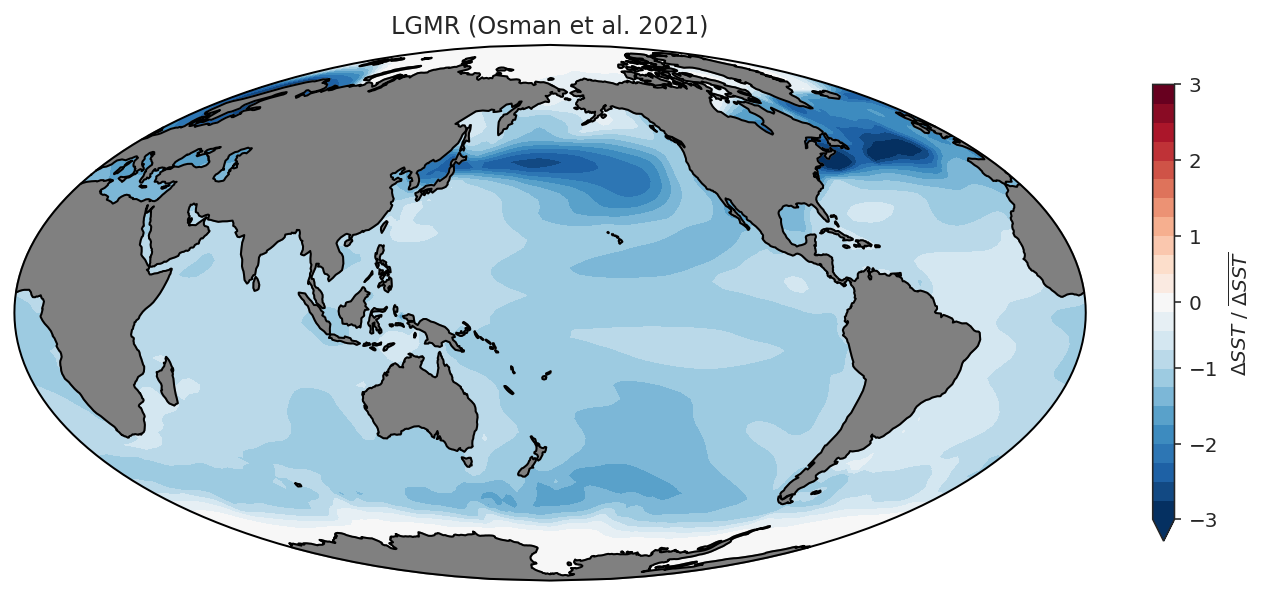

In [51]:
with sns.axes_style('ticks'):
    nlevs = 6*4 ## must be even
    vabs = 3
    levs = np.delete(np.linspace(-vabs,vabs,nlevs+1),nlevs//2)
    cmap=plt.cm.get_cmap('RdBu_r', nlevs-1)

    fig,ax = plt.subplots(1,1,figsize=(12,7), dpi=72*2, 
                          subplot_kw={'projection':ccrs.Mollweide(central_longitude=180)})
    axtemp = ax
    plt.sca(axtemp)

    ds = lgm_infill_regrid.sst - holo_infill_regrid.sst
    gmean = (ds * landfrac.area.values).sum() / landfrac.area.values.sum()
    ds = -ds/gmean.values 
    ## add cyclic point
    lon_idx = ds.dims.index('lon')
    lon = ds.coords['lon']
    wrap_ds, wrap_lon = add_cyclic_point(ds.values, coord=lon, axis=lon_idx)

#     plt.pcolormesh(ds.lon, ds.lat, ds,
#                 cmap = cmap, vmin=-vabs,vmax=vabs,#levels=levs, 
#                 transform=ccrs.PlateCarree())
    plt.contourf(wrap_lon, ds.lat, wrap_ds,
                cmap = cmap, vmin=-vabs,vmax=vabs,levels=levs, extend='min',
                transform=ccrs.PlateCarree())

    # plt.colorbar(shrink=0.6)
    plt.colorbar(shrink=0.6,ticks=np.arange(-vabs,vabs+0.1,1), 
                 label='$\Delta SST$ / $\overline{\Delta SST}$')
    axtemp.add_feature(cfeature.LAND,alpha=1,color='0.5',zorder=1)
    axtemp.coastlines(color='k',zorder=1)
#     axtemp.gridlines(zorder=6,alpha=0.2)
    plt.title('LGMR (Osman et al. 2021)')
    plt.show()